<a href="https://colab.research.google.com/github/SayedShaun/Machine-Learning/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
sns.set_style("darkgrid")
plt.style.use("fivethirtyeight")
import warnings
warnings.filterwarnings("ignore")
import streamlit as st

## Customer Segmentation

In [ ]:
!kaggle datasets download -d vetrirah/customer

Dataset URL: https://www.kaggle.com/datasets/vetrirah/customer
License(s): CC0-1.0
customer.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
unzipper("/content/customer.zip")

In [ ]:
df = pd.read_csv("/content/Train.csv")
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df = df[["Gender", "Ever_Married", "Age", "Graduated", "Profession", "Work_Experience", "Segmentation"]]
df = df.dropna().drop_duplicates()

In [ ]:
def category_plot(col):
  plt.figure(figsize=(6, 6))
  df[col].value_counts().plot(kind="pie", autopct="%1.1f%%")
  plt.title(col)
  plt.tight_layout()
  plt.show()

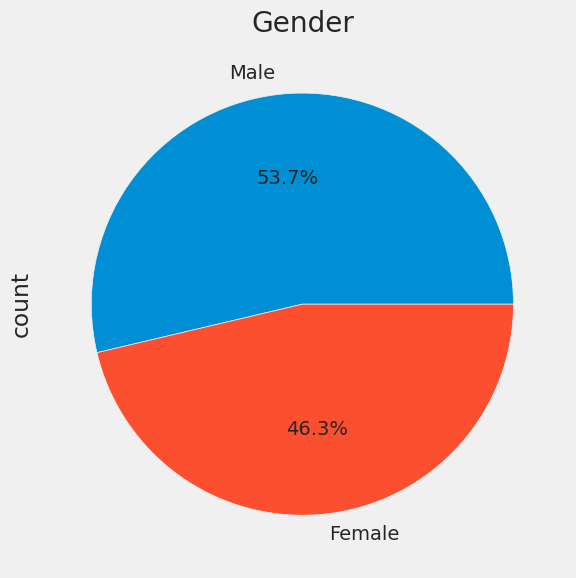

In [ ]:
category_plot("Gender")

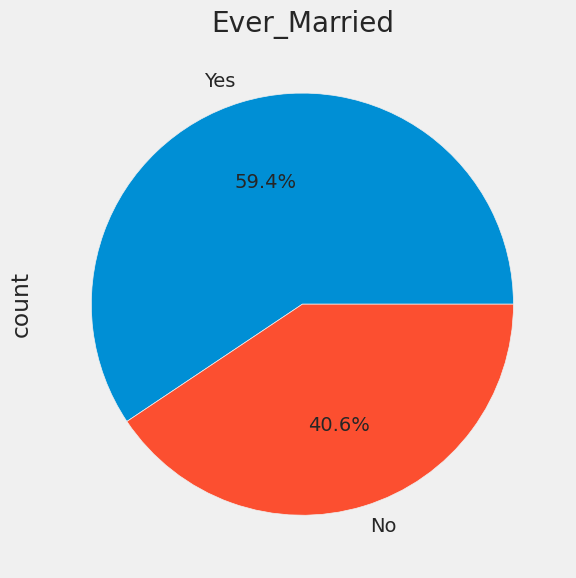

In [ ]:
category_plot("Ever_Married")

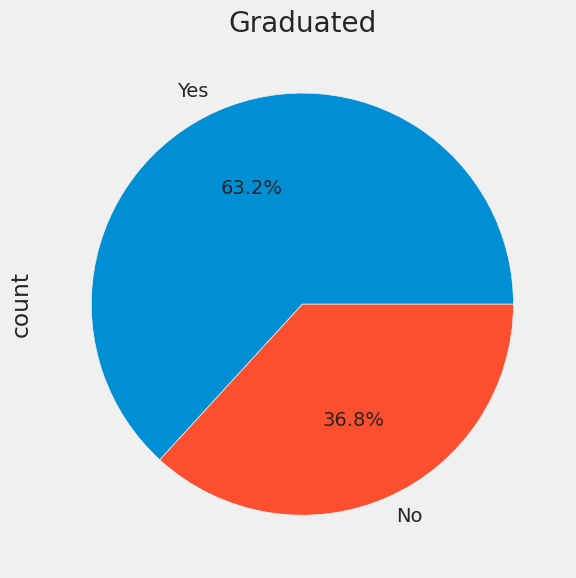

In [ ]:
category_plot("Graduated")

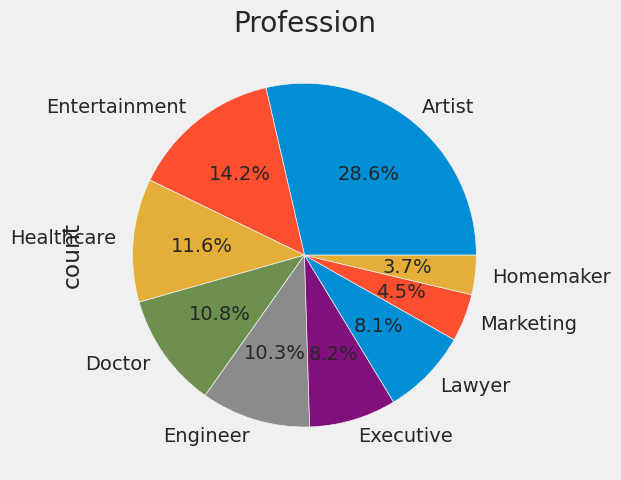

In [ ]:
category_plot("Profession")

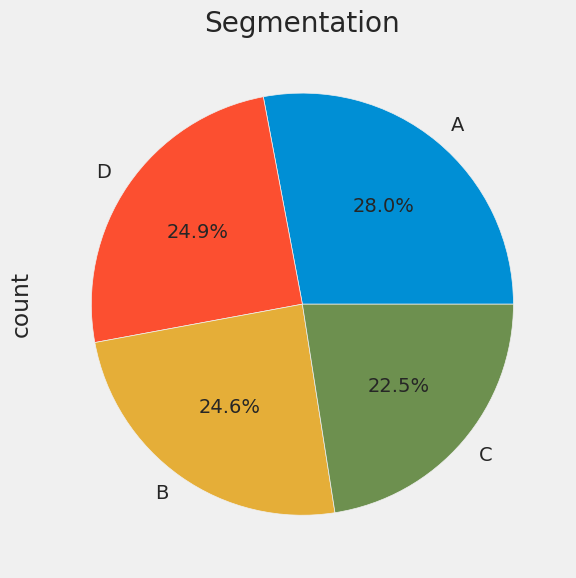

In [ ]:
category_plot("Segmentation")

In [ ]:
from sklearn.preprocessing import LabelEncoder

def label_encoder(dataframe, col):
  le = LabelEncoder()
  dataframe[col] = le.fit_transform(dataframe[col])
  return dataframe

In [ ]:
for col in df.columns:
  if df[col].dtype == "object":
    label_encoder(df, col)

In [ ]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Segmentation
0,1,0,22,0,5,1.0,3
2,0,1,67,1,2,1.0,1
3,1,1,67,1,7,0.0,1
5,1,1,56,0,0,0.0,2
6,1,0,32,1,5,1.0,2


In [ ]:
x = df.drop("Segmentation", axis=1)
y = df["Segmentation"]

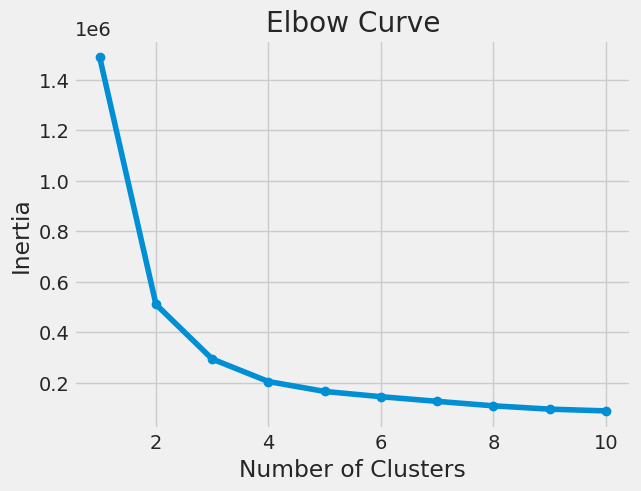

In [ ]:
# Plot Elbow Curve
inertia = []
for k in range(1, 11):
  x_model = KMeans(n_clusters=k)
  x_model.fit(x)
  inertia.append(x_model.inertia_)

plt.plot(range(1, 11), inertia, marker="o")
plt.title("Elbow Curve")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
model.fit(x)

KMeans(n_clusters=4)

In [ ]:
np.unique(model.fit_predict(x))

array([0, 1, 2, 3], dtype=int32)

In [ ]:
# Quick Test
age = 55
gender = 1
married = 1
graduated = 1
profession = 6
work_experience = 5
model.predict(
    [[
        age,
        gender,
        married,
        graduated,
        profession,
        work_experience
    ]]
)

array([3], dtype=int32)